### USED CARS PRICE PREDICTION

#### Domain – Price Prediction

#### Overview
Congratulations!!!! for making it so far. This is the Certification Project for Data with Python
Certification Course here we will use all the concepts learned so far in this course.
Context
Riding the digital wave, India's used car market is set to grow at a compounded annual
growth of 11% and is likely to touch sales of up to 8.3 million units by FY26 as more
people have been opting for pre-owned cars for personal mobility in the pandemic amid the
ongoing supply shortages for manufacturing new cars.
The used car market in the country is expected to reach over 70 lakh vehicles by
2025-26, up from 38 lakh in 2020-21 as the Covid-19 pandemic, digitalization, changing
demographics and aspirations, first-time buyers, and availability of financing options are
acting as growth drivers, according to a report by OLX Autos and rating agency Crisil.
"MyCars" is a new-age startup laying foundations in the setting up a car resell domain and
they are setting up a team of ML experts to make predictive models determine
the price of second-hand cars to optimize their revenue, you have joined as a new Data
Scientist and your role is to create a model to determine the selling price of a used car.

#### Objective:
    ● Provide the best-performing model to determine the price of the used car.
    ● Providing the most important features which determine the price.

#### Data Description
The data provided consists of the following Data Dictionary

    ● Id: Unique ID assigned to a specific car.
    ● year: Manufacture year of the car.
    ● brand: Brand of the car.
    ● full_model_name: Model name includes other details such as engine capacity,transmission, etc., basically a detailed model name.
    ● model_name: Just the model name of the car.
    ● price: Sell price of the 2nd ownership car.
    ● distance_travelled(km): Distance traveled by car.
    ● fuel_type : Fuel engine type .
    ● city: City where the car is registered.
    ● car_age: Age of the car.

#### Steps and Tasks:
    ● Import libraries and load dataset
    ● Exploratory Data Analysis:
        ○ Univariate Analysis to understand the distribution of features.
        ○ Multivariate analysis to determine correlations.
    ● Layout regression experiment space.
    ● Publish the performance of all the models on the same hold-out/ test dataset.
    ● List out the most important features determining the price of used cars.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df=pd.read_csv("data/cars.csv")
df.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.00,9680.00,Petrol,Mumbai,7,5.00
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.00,119120.00,Diesel,Mumbai,11,9.00
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.00,64593.00,Diesel,Thane,1,4.00
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.00,25000.00,Diesel,Mumbai,2,4.00
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.00,23800.00,Diesel,Mumbai,14,9.00


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


In [90]:
df.nunique()

Id                         1725
year                         19
brand                        31
full_model_name             750
model_name                  169
price                       404
distance_travelled(kms)     649
fuel_type                     5
city                         15
brand_rank                   29
car_age                      19
dtype: int64

In [91]:
# check for missing values
df.isnull().sum()
# no missing values

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [92]:
# since Id is unique identifier, it doesn't contribute to any prediction, thus drop Id column
df.drop("Id", axis=1, inplace=True)
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank',
       'car_age'],
      dtype='object')

In [93]:
df['brand'].unique()

array(['Honda', 'Nissan', 'Toyota', 'Mercedes-Benz', 'Hyundai',
       'Maruti Suzuki', 'Renault', 'Volkswagen', 'Skoda', 'BMW', 'Tata',
       'Audi', 'Bentley', 'Ford', 'Mahindra', 'Jaguar', 'Lamborghini',
       'MINI', 'Land Rover', 'Chevrolet', 'Datsun', 'Jeep', 'Porsche',
       'Volvo', 'MG', 'Lexus', 'Mitsubishi', 'Kia', 'Fiat', 'Isuzu',
       'Mahindra-Renault'], dtype=object)

### Exploratory Data Analysis

In [94]:
# statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1725.00,2015.39,3.21,1990.00,2013.00,2016.00,2018.00,2021.00
price,1725.00,1494837.39,1671657.73,62500.00,545000.00,875000.00,1825000.00,14700000.00
distance_travelled(kms),1725.00,53848.26,44725.54,350.00,29000.00,49000.00,70500.00,790000.00
brand_rank,1725.00,15.73,12.95,1.00,5.00,14.00,24.00,81.00
car_age,1725.00,5.61,3.21,0.00,3.00,5.00,8.00,31.00


#### From statistical summary, we can infer that:
    - Year ranges between 1990-2021
    - Average kilometer travelled by the cars are 53km. The range shows huge difference between min 350 to max 790000, its an evidence of outlier. This record can be removed
    - The max price of a used car is 147k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue
    

In [95]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,1725.00,NaN,NaN,NaN,2015.39,3.21,1990.00,2013.00,2016.00,2018.00,2021.00
brand,1725,31,Hyundai,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_model_name,1725,750,Ford EcoSport Titanium 1.5L TDCi,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_name,1725,169,Creta,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1725.00,NaN,NaN,NaN,1494837.39,1671657.73,62500.00,545000.00,875000.00,1825000.00,14700000.00
distance_travelled(kms),1725.00,NaN,NaN,NaN,53848.26,44725.54,350.00,29000.00,49000.00,70500.00,790000.00
fuel_type,1725,5,Diesel,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1725,15,Chennai,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_rank,1725.00,NaN,NaN,NaN,15.73,12.95,1.00,5.00,14.00,24.00,81.00
car_age,1725.00,NaN,NaN,NaN,5.61,3.21,0.00,3.00,5.00,8.00,31.00


In [96]:
# lets separate categorical and numerical columns
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns

print(f"Categorical Columns : {cat_cols}")
print(f"Numerical Colums: {num_cols}")

Categorical Columns : Index(['brand', 'full_model_name', 'model_name', 'fuel_type', 'city'], dtype='object')
Numerical Colums: Index(['year', 'price', 'distance_travelled(kms)', 'brand_rank', 'car_age'], dtype='object')


 ### Univariate Data Analysis

year
Skew : -0.94


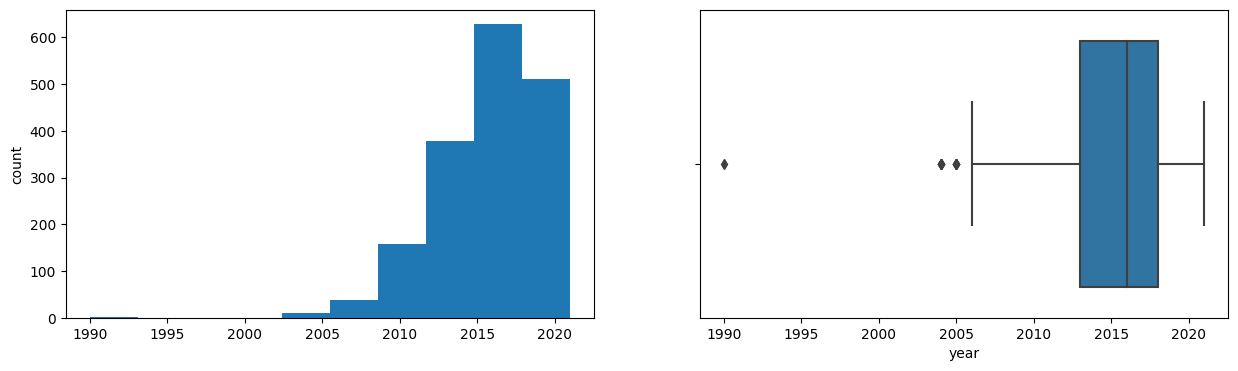

price
Skew : 3.17


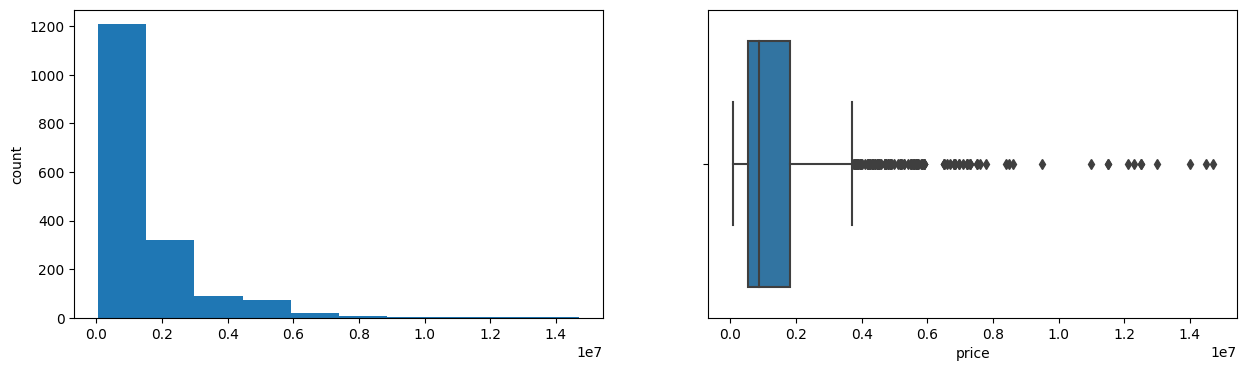

distance_travelled(kms)
Skew : 6.85


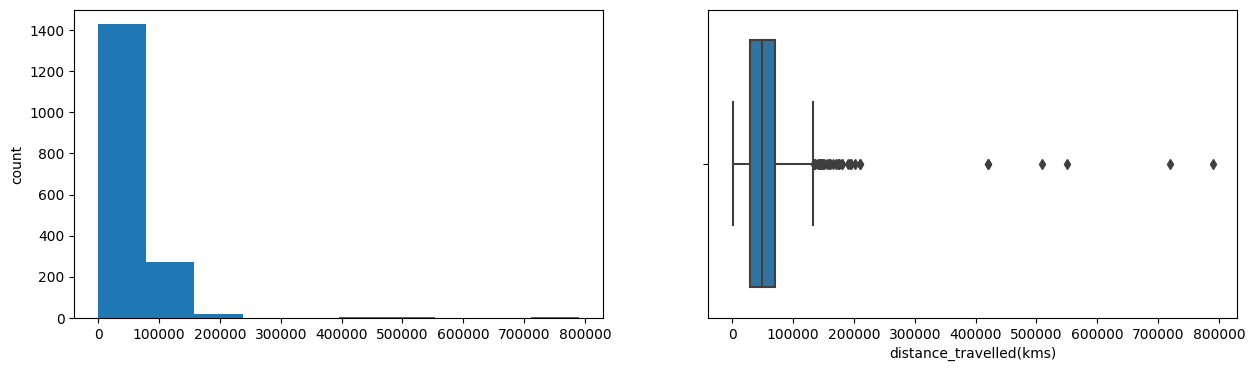

brand_rank
Skew : 1.19


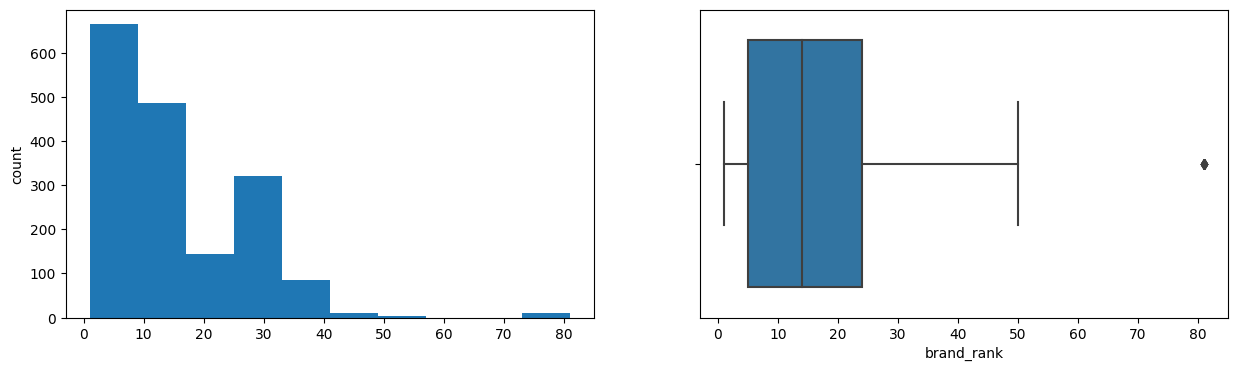

car_age
Skew : 0.94


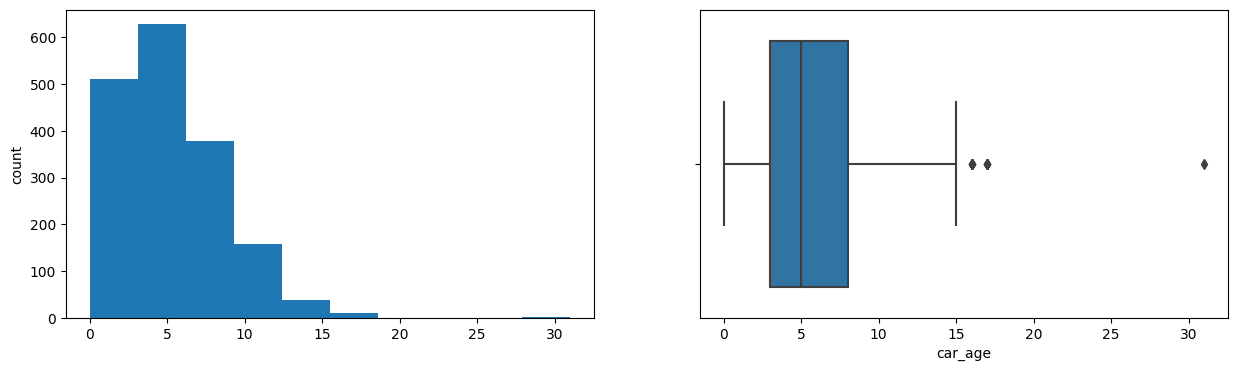

In [97]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

year is right skewed, whereas car_age, brand_rank, distance travelled , and price is left skewed

In [98]:
cat_cols

Index(['brand', 'full_model_name', 'model_name', 'fuel_type', 'city'], dtype='object')

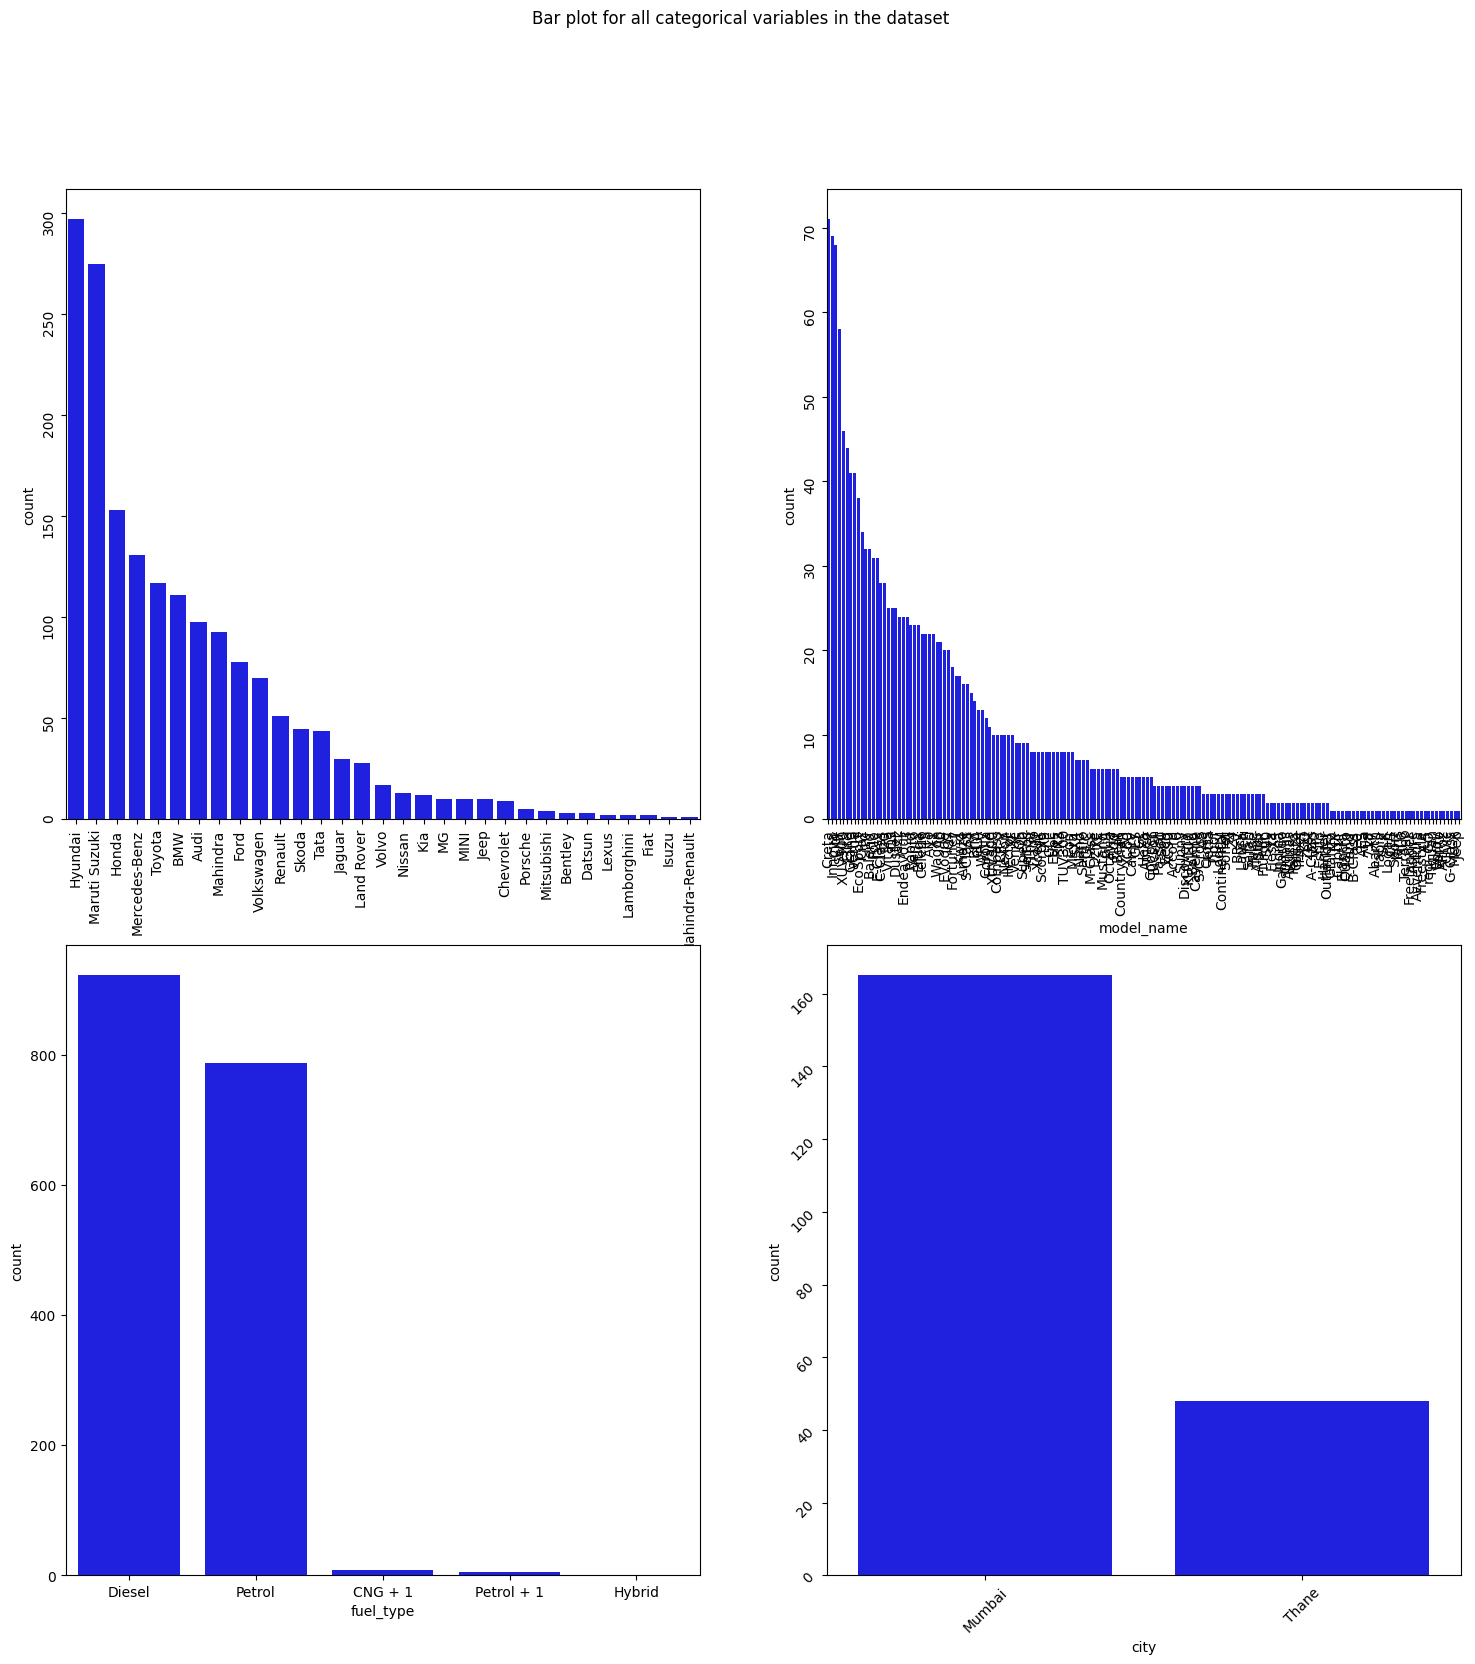

In [99]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'brand', data = df, color = 'blue', 
              order = df['brand'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'model_name', data = df, color = 'blue', 
              order = df['model_name'].value_counts().index);


sns.countplot(ax = axes[1, 0], x = 'fuel_type', data = df, color = 'blue', 
              order = df['fuel_type'].value_counts().index);

sns.countplot(ax = axes[1, 1], x = 'city', data = df, color = 'blue', 
              order = df['city'].head(20).value_counts().index);


axes[1][1].tick_params(labelrotation=45);
axes[0][1].tick_params(labelrotation=90);
axes[0][0].tick_params(labelrotation=90);


#### Observations
- More cars have fuel type as Diesel this shows diesel cars provide higher performance
- More cars belong to the brand Hyundai followed by Maruti
- More cars are in city Mumbai

### Dealing with outliers


In [100]:
# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df['price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
df = df[df['price']<q]

C:\Users\736944\AppData\Local\Temp\ipykernel_4084\203861026.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Car Price Distribution Plot')

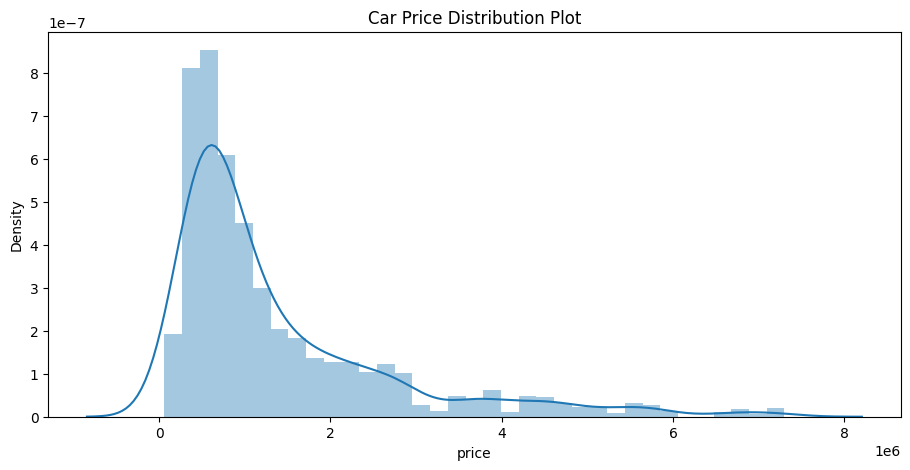

In [101]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(df['price'])
plt.title('Car Price Distribution Plot')

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1706.00,2015.38,3.20,1990.00,2013.00,2016.00,2018.00,2021.00
price,1706.00,1391321.51,1336296.85,62500.00,541250.00,870000.00,1782500.00,7300000.00
distance_travelled(kms),1706.00,54175.46,44818.36,350.00,29532.00,49877.00,70817.50,790000.00
brand_rank,1706.00,15.71,12.88,1.00,7.00,14.00,24.00,81.00
car_age,1706.00,5.62,3.20,0.00,3.00,5.00,8.00,31.00


### Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

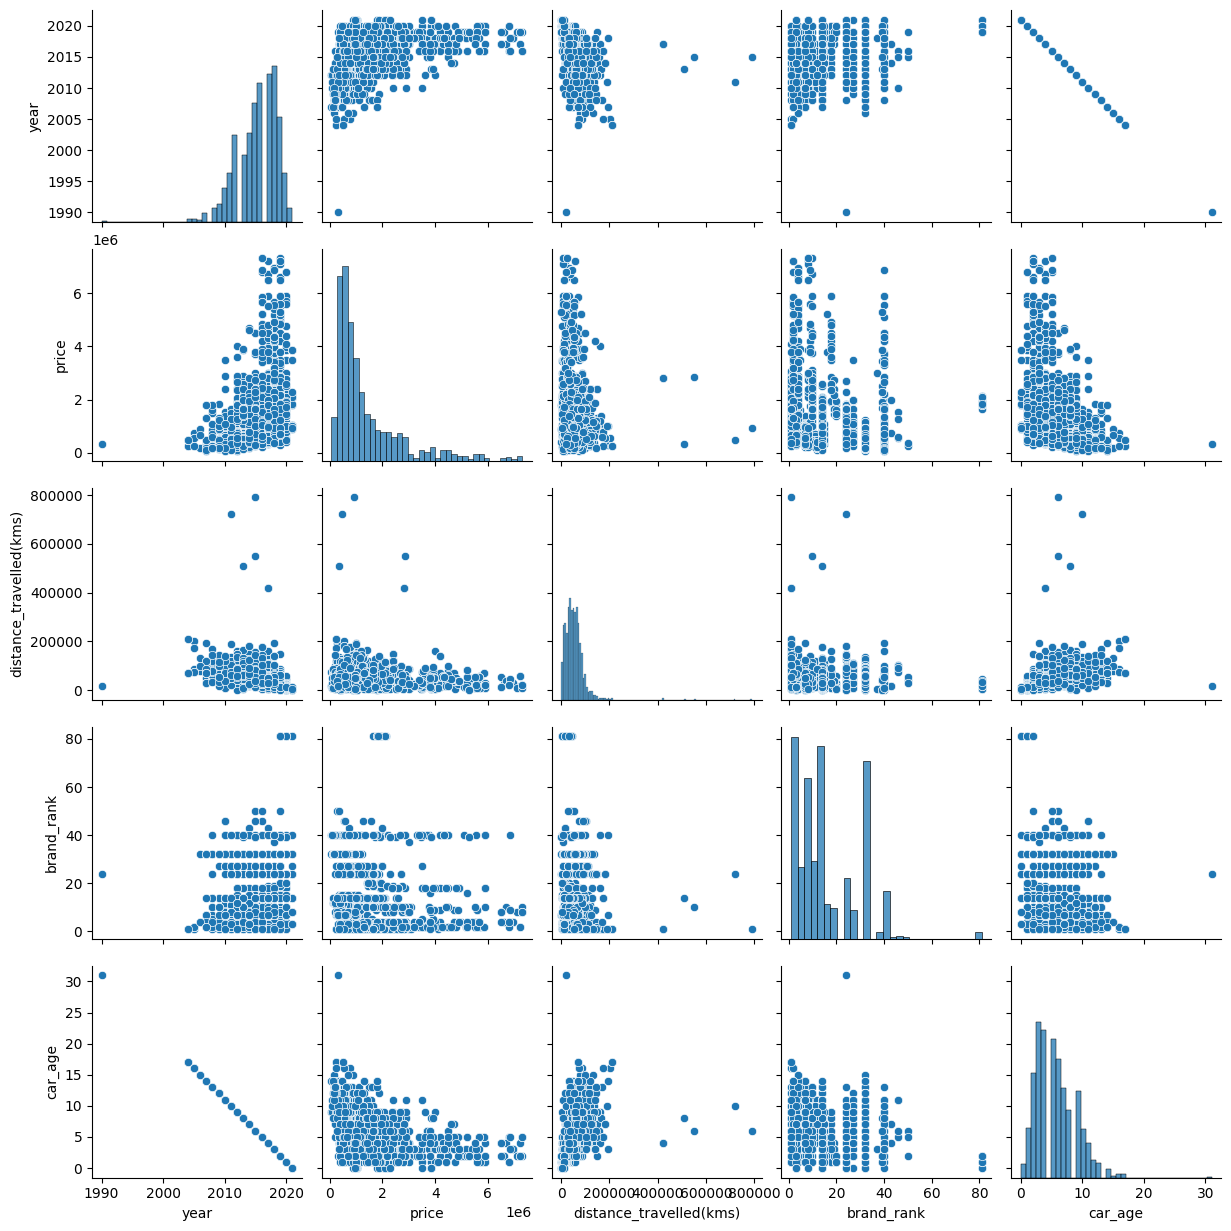

In [103]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df)
plt.show()

#### observation
    - year and car_age is highly negatively correlated

C:\Users\736944\AppData\Local\Temp\ipykernel_4084\4189254962.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



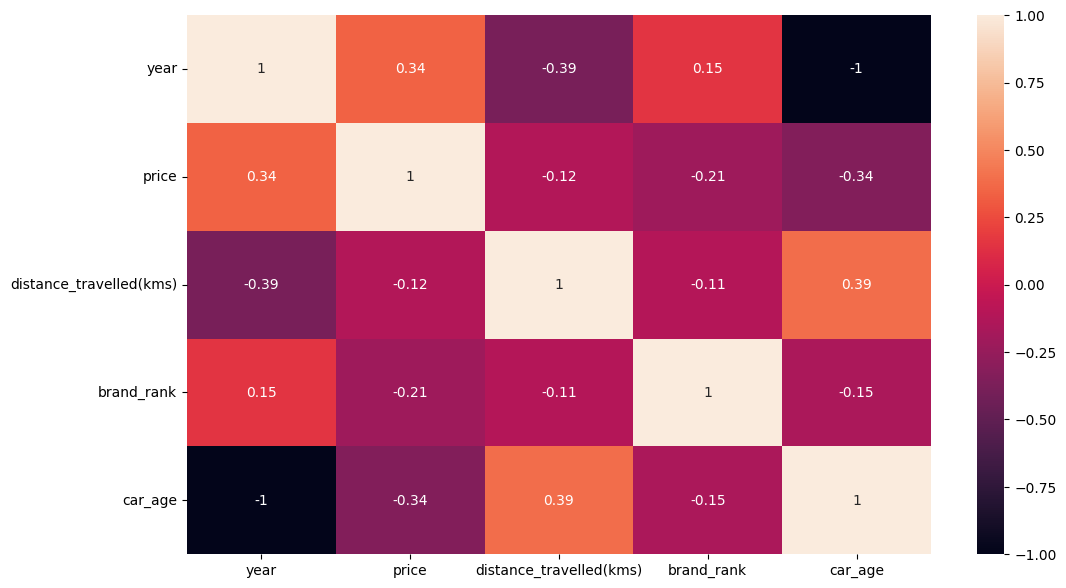

In [104]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [105]:
# Handle categorical data
for col in cat_cols:
    
    encoder=LabelEncoder()
    df[col]=encoder.fit_transform(df[col])
df.head()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,2016,6,127,26,425000.00,9680.00,3,9,7,5.00
1,2012,21,560,122,325000.00,119120.00,1,9,11,9.00
2,2017,26,664,66,2650000.00,64593.00,1,14,1,4.00
3,2017,19,519,48,4195000.00,25000.00,1,9,2,4.00
4,2012,7,255,137,475000.00,23800.00,1,9,14,9.00


In [106]:
# train test split
X=df.drop("price", axis=1)
y=df["price"]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=42)

In [107]:
# perform standard scaler on numerical data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [108]:
# Multiple regressor model
regressors = [
    LinearRegression(),
    XGBRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(), 
    GradientBoostingRegressor()
]

In [109]:

res = pd.DataFrame(columns=['Model', 'RMSE', 'R-Squared'])
RMSE = []
R2 = []
for num, regressor in enumerate(regressors):
    reg = regressor.fit(X_train, y_train)
    pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(pred, y_test))
    r2 = r2_score(pred, y_test)
    RMSE.append(str(np.around(rmse)))
    R2.append(str(round(r2, 2)*100) + '%')
res['Model'] = ['LinearRegression', 'XGBRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor', 'GradientBoostingRegressor']
res['RMSE'] = RMSE
res['R-Squared'] = R2
res

,Model,RMSE,R-Squared
0,LinearRegression,983635.0,-62.0%
1,XGBRegressor,521672.0,79.0%
2,RandomForestRegressor,490949.0,81.0%
3,ExtraTreesRegressor,593796.0,73.0%
4,GradientBoostingRegressor,589906.0,71.0%


In [110]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid2 = {
    "learning_rate": [0.2, 0.25],
    "n_estimators": [i for i in range(270,300,10)],
    'max_depth': [i for i in range(13,19)],
    "min_samples_leaf": [i for i in range(30,50)],
    
    'alpha': [0.1, 0.2]
    
}

# regressor = LGBMRegressor()
# gscv_lgbm2 = GridSearchCV(regressor, param_grid2, scoring='neg_mean_squared_error', cv=3)
# gscv_lgbm2.fit(X_train, y_train)
# yhat_lgbmr = gscv_lgbm2.predict(X_test)
# print(gscv_lgbm2.best_params_)
# np.sqrt(mean_squared_error(y_test, yhat_lgbmr))

for x in range(0,50):
    gscv_lgbm2 = RandomizedSearchCV(regressor, param_grid2, scoring='neg_mean_squared_error', cv=3)
    gscv_lgbm2.fit(X_train, y_train)
    yhat_lgbmr = gscv_lgbm2.predict(X_test)
    k = np.sqrt(mean_squared_error(y_test, yhat_lgbmr))
    if k < 67596171:
        print(gscv_lgbm2.best_params_)
        print(k)

{'n_estimators': 270, 'min_samples_leaf': 38, 'max_depth': 14, 'learning_rate': 0.25, 'alpha': 0.2}
486449.9579953698
{'n_estimators': 290, 'min_samples_leaf': 35, 'max_depth': 13, 'learning_rate': 0.2, 'alpha': 0.1}
495524.16708820453
{'n_estimators': 270, 'min_samples_leaf': 37, 'max_depth': 13, 'learning_rate': 0.2, 'alpha': 0.2}
495508.3914623349
{'n_estimators': 290, 'min_samples_leaf': 38, 'max_depth': 13, 'learning_rate': 0.2, 'alpha': 0.2}
484588.45470612607
{'n_estimators': 290, 'min_samples_leaf': 38, 'max_depth': 18, 'learning_rate': 0.25, 'alpha': 0.1}
482625.0018625871
{'n_estimators': 270, 'min_samples_leaf': 33, 'max_depth': 13, 'learning_rate': 0.25, 'alpha': 0.1}
483579.2522835039
{'n_estimators': 290, 'min_samples_leaf': 32, 'max_depth': 15, 'learning_rate': 0.2, 'alpha': 0.1}
473369.31321870536
{'n_estimators': 290, 'min_samples_leaf': 31, 'max_depth': 15, 'learning_rate': 0.25, 'alpha': 0.2}
454385.94433359127
{'n_estimators': 290, 'min_samples_leaf': 33, 'max_depth

In [111]:
regressor = LGBMRegressor()

params ={'n_estimators': 290, 'min_samples_leaf': 32, 'max_depth': 18, 'learning_rate': 0.25, 'alpha': 0.2}
regressor.set_params(**params)
reg = regressor.fit(X_train, y_train)
pred = reg.predict(X_test)
pred = np.around(pred, decimals=-6) #lam tron gia tien
rmse = np.sqrt(mean_squared_error(pred, y_test))
print(f'{regressor} has rmse of {rmse}')

LGBMRegressor(alpha=0.2, learning_rate=0.25, max_depth=18, min_samples_leaf=32,
              n_estimators=290) has rmse of 584487.7047065448


In [122]:
feature_imp = pd.DataFrame({'Value':reg.feature_importances_,'Feature':X.columns})
dat = feature_imp.sort_values(by='Value',ascending=True)


#### ****  most important feature is distance travelled followed byfull_ model_name

<BarContainer object of 9 artists>

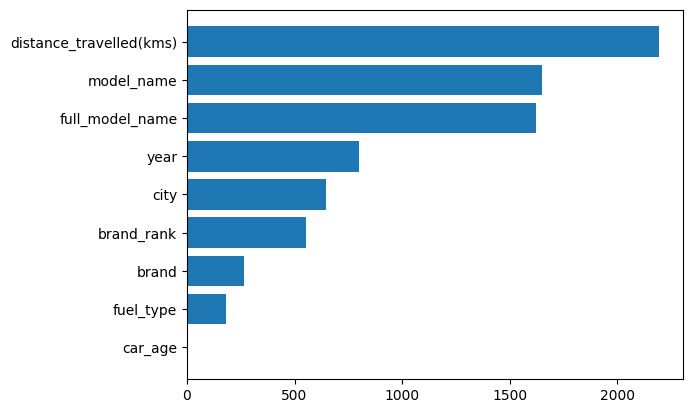

In [123]:
plt.barh( dat["Feature"], dat["Value"])